# Exploratory Data Analysis

In [1]:
# IMPORTS

import os
import zipfile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Unzip and import data

In [2]:
if not os.path.exists('data/full_data.csv'):    # unzip data if not already
    with zipfile.ZipFile('data/full_data.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

df = pd.read_csv('data/full_data.csv')  # read data into dataframe

df

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,1,3282490636,3723861767,592628169,2093237750,3617548381,2965721776,3543218850,1072184752,1418147852,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1,1,2736633149,3188050045,3599848058,2300041243,3503728323,1531702445,3543218850,2634671414,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
2,1,1067402948,108565582,2502341442,3474641266,3503728323,1531702445,3543218850,4108477053,870407079,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
3,1,3634365896,2567512859,753387811,2124887610,3503728323,2965721776,3543218850,4108477053,3981694603,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
4,1,3282490636,1241498584,99521842,868270843,3503728323,1531702445,3543218850,4108477053,3377404711,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572873,0,719059834,108565582,1622567635,265581914,3503728323,2965721776,3543218850,3153333045,1315254508,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
1572874,1,3855058850,3117534041,148578446,1880637442,3617548381,1531702445,3543218850,1072184752,603519084,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572875,1,59570122,2236475198,3022312119,2120140848,3503728323,1531702445,3543218850,3371001158,2147952612,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572876,1,1439395589,2819363971,12381797,4195009840,3503728323,2965721776,3543218850,2265512916,2246488302,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631


## Cardinality of features

* 7 features have only one unique value (useless)
* 8 features and label are binary
* feature50 highest cardinality (cca. 600K unique values in 1.5M samples)
* features 53, 52, 60, 33 also high cardinality (250K - 300K unique values)
* 20 features have more than 1K unique values

In [3]:
df_categorical = df.astype('category')  # convert to categorical
df_categorical.describe()

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
count,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,...,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878
unique,2,295,2526,39404,14633,2,2,2,60,2508,...,2,3,1,1,1,1,1,1,2,2
top,0,3282490636,1241498584,104543806,3589864534,3503728323,1531702445,3543218850,4108477053,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
freq,1260151,466145,50997,19997,32730,1398630,1167773,1571632,228587,278352,...,1306405,1306405,1572878,1572878,1572878,1572878,1572878,1572878,1260151,1260151


In [4]:
# ratio of clicked ads
df_categorical['info_click_valid'].value_counts() / df_categorical['info_click_valid'].count()

0    0.801175
1    0.198825
Name: info_click_valid, dtype: float64

In [5]:
# features with only one unique value
df_categorical.nunique()[df_categorical.nunique() == 1]

feature70    1
feature92    1
feature93    1
feature94    1
feature95    1
feature96    1
feature97    1
dtype: int64

In [6]:
# binary features
df_categorical.nunique()[df_categorical.nunique() == 2]

info_click_valid    2
feature4            2
feature5            2
feature6            2
feature14           2
feature32           2
feature90           2
feature98           2
feature99           2
dtype: int64

In [7]:
# NaNs
df_categorical.isna().sum()

# no NaNs in the dataset

info_click_valid    0
feature0            0
feature1            0
feature2            0
feature3            0
                   ..
feature95           0
feature96           0
feature97           0
feature98           0
feature99           0
Length: 101, dtype: int64

In [8]:
df_categorical.nunique().sort_values(ascending=False)

feature50    647413
feature53    288986
feature52    261178
feature60    259917
feature33    250802
              ...  
feature93         1
feature94         1
feature95         1
feature96         1
feature97         1
Length: 101, dtype: int64

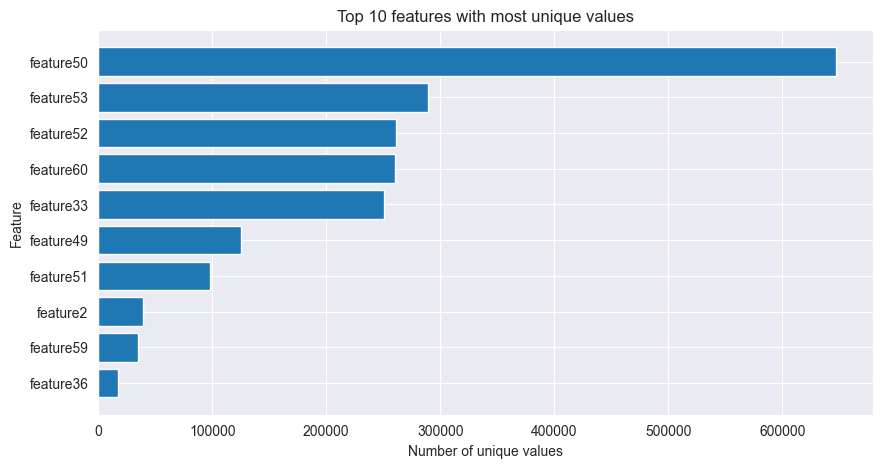

In [32]:
# Features with most unique values (top 10)

plt.figure(figsize=(10, 5))
plt.barh(df_categorical.nunique().sort_values(ascending=False).index[:10],
        df_categorical.nunique().sort_values(ascending=False).values[:10])
plt.gca().invert_yaxis()
plt.ylabel('Feature')
plt.xlabel('Number of unique values')
plt.title('Top 10 features with most unique values')
plt.show()


## Distribution of values in features, dominant values, sparsity

* ad is clicked only in about 20% of samples
* 13 features have a very dominant value (appears in more than 90% of samples) - not counting one-unique-value features
* 31 features have a dominant value (appears in more than 75% of samples) - not counting one-unique-value features
* guess is that dominant values represent None value (just coded as categorical value)
* features 81-89 very similar distribution of values
* features 2, 3, 20 also similar distribution of values
* all binary features unbalanced (cca 80-20)
*


In [10]:
df_categorical['feature20'].value_counts().values

array([180849,  88610,  74592,  70220,  67868,  53828,  51623,  49308,
        47416,  47294,  46027,  42553,  39785,  35499,  25238,  23661,
        22112,  20122,  18225,  14790,  14709,  13744,  13375,  11387,
        11368,  10325,  10223,   9941,   9826,   9718,   9347,   9311,
         8918,   8541,   8169,   7876,   7759,   7634,   7506,   7465,
         7386,   6995,   6739,   6600,   6522,   6271,   6191,   5979,
         5862,   5792,   5781,   5670,   5185,   5168,   5060,   4976,
         4852,   4729,   4701,   4645,   4644,   4531,   4514,   4448,
         4432,   4316,   4225,   4185,   4121,   3855,   3823,   3801,
         3707,   3534,   3523,   3437,   3408,   3353,   3263,   3172,
         3125,   3105,   2878,   2859,   2824,   2777,   2753,   2740,
         2622,   2592,   2480,   2330,   2325,   2297,   2293,   2244,
         2192,   2114,   2051,   2044,   2035,   1947,   1944,   1920,
         1895,   1884,   1879,   1804,   1770,   1765,   1753,   1711,
      

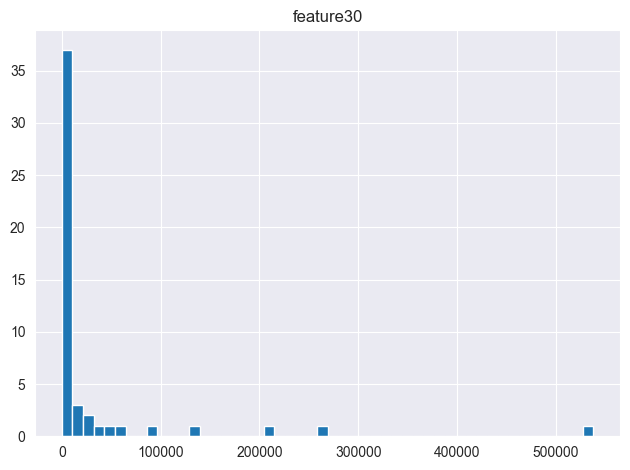

In [12]:
plt.hist(df_categorical['feature30'].value_counts().values, bins=len(df_categorical['feature30'].value_counts().index))
plt.title('feature30')
#plt.xticks(df_categorical[feature].value_counts().values)
plt.tight_layout()
plt.show()

In [13]:
# change values to string
df_categorical_string = df_categorical.astype(str)

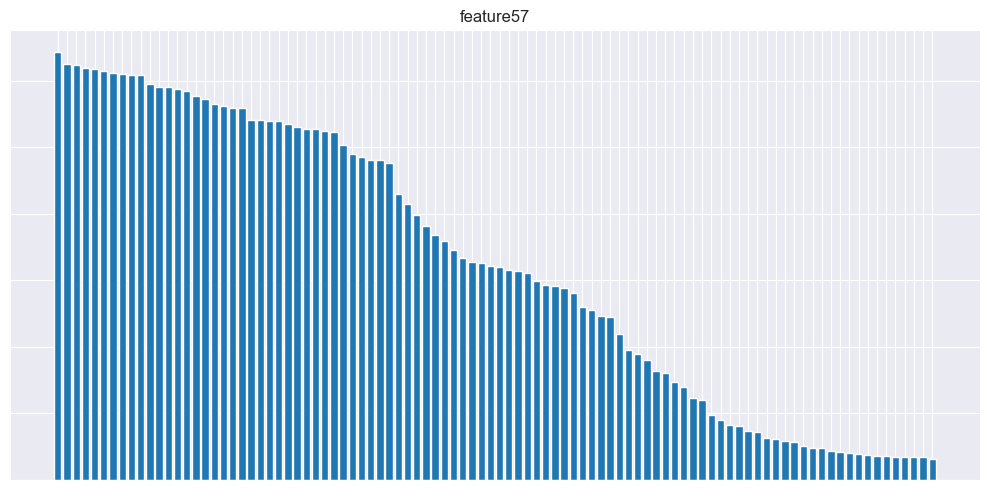

In [28]:
# distribution of unique values for feature 57

plt.figure(figsize=(10, 5))
plt.bar(df_categorical_string['feature57'].value_counts().index,
        df_categorical_string['feature57'].value_counts().values)
plt.title('feature57')
plt.xticks(rotation=90)
# hide x labels
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

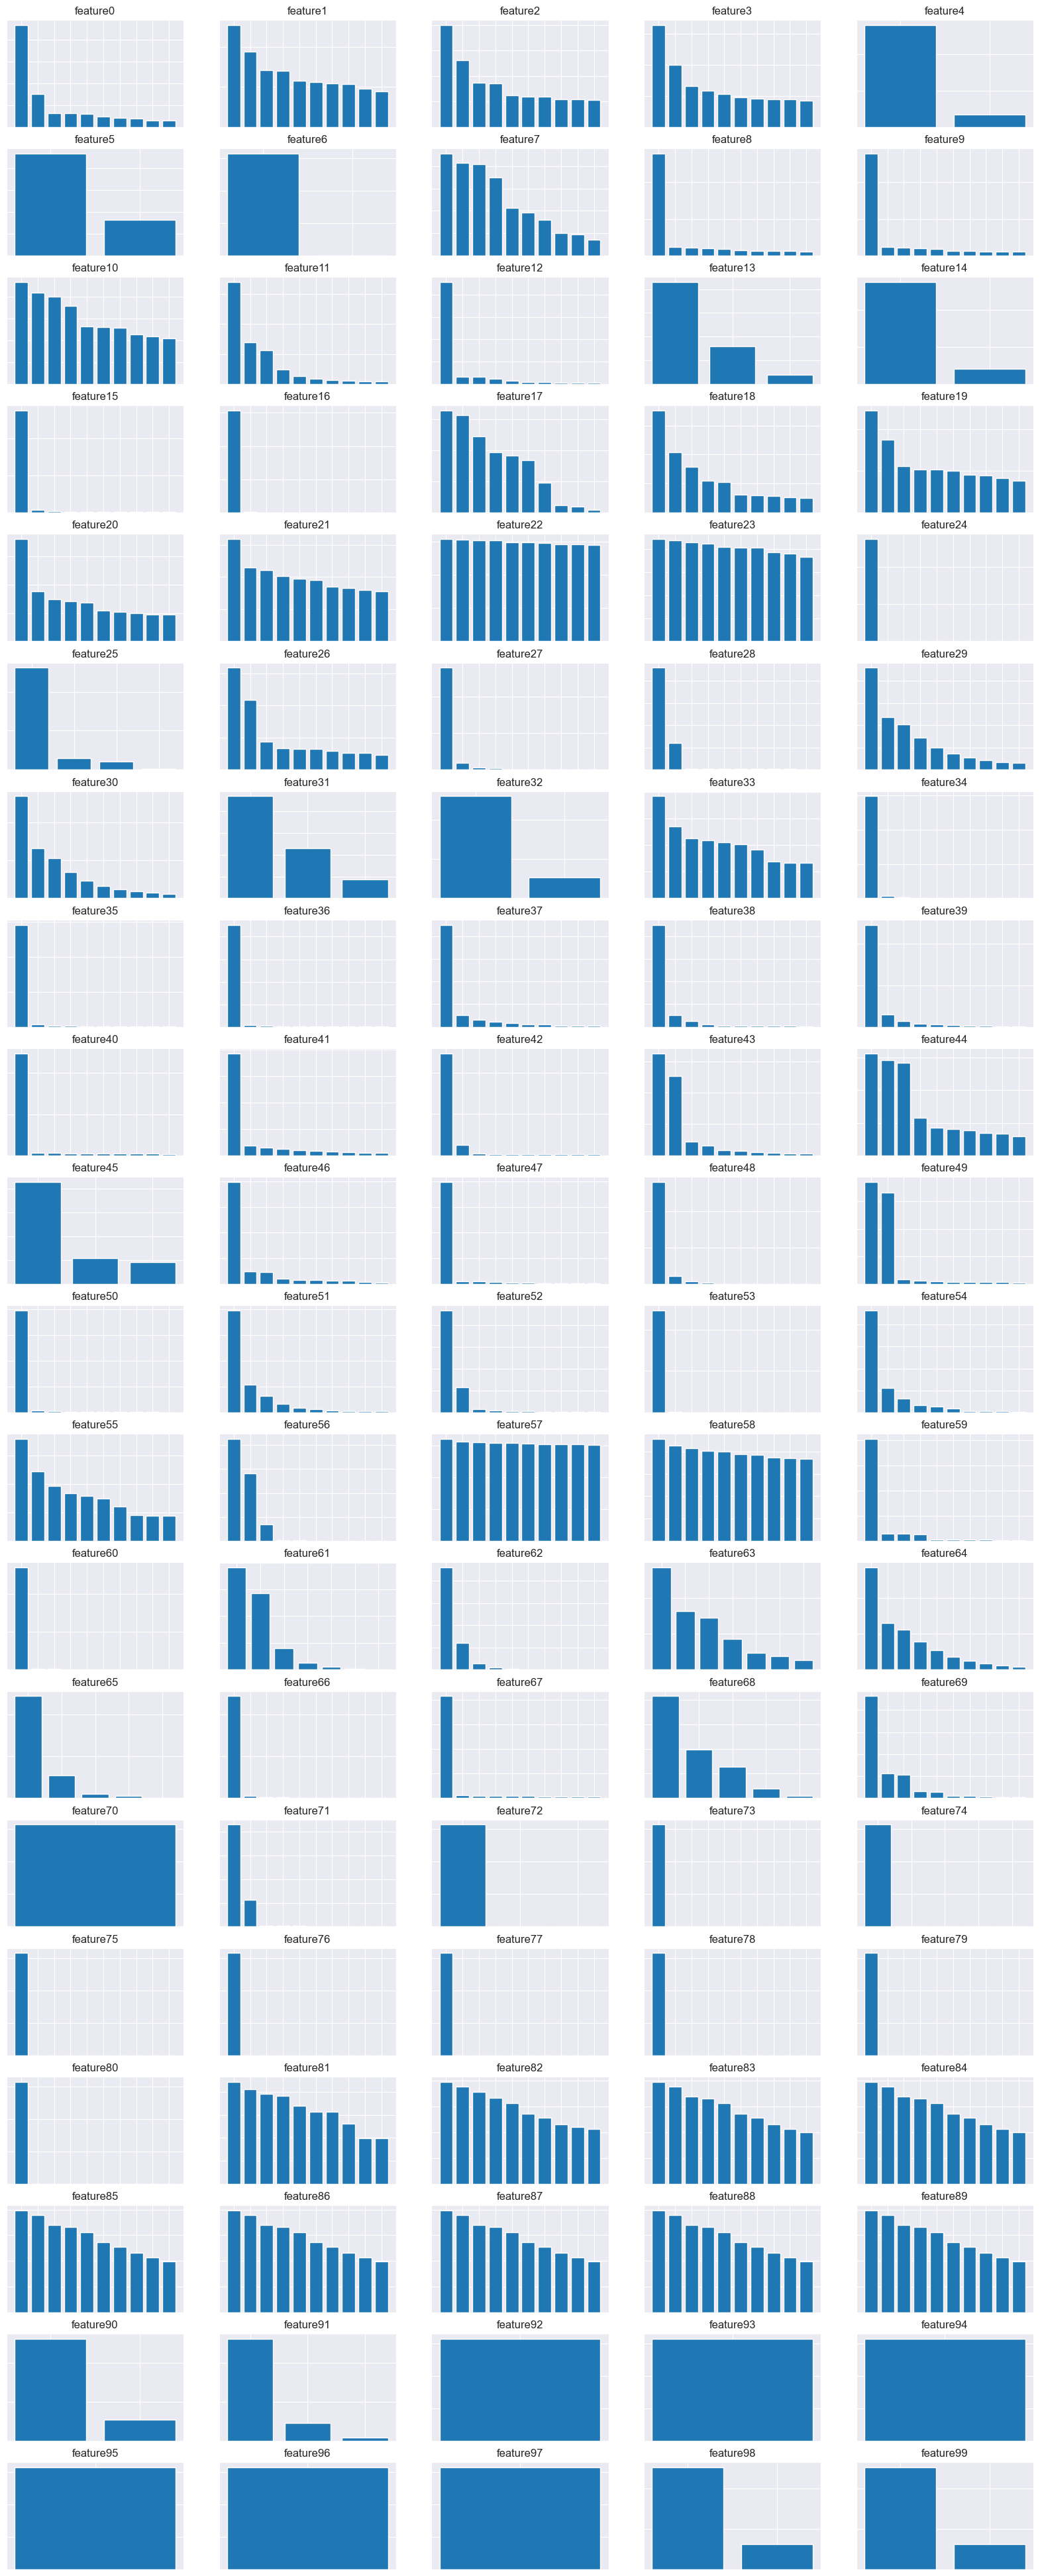

In [15]:
# distribution of feature values (only top 10 for clarity)

plt.figure(figsize=(20, 50))
for i, feature in enumerate(df_categorical.columns[1:]):
    plt.subplot(20, 5, i + 1)
    plt.bar(df_categorical_string[feature].value_counts()[:10].index,
            df_categorical_string[feature].value_counts()[:10].values)
    plt.title(feature)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])

plt.show()

In [26]:
# number of features with a dominant value

def get_features_with_dominant_values(threshold):
    dominant_features = 0
    for feature in df_categorical.columns[1:]:
        if df_categorical[feature].value_counts().values[0] / df_categorical[feature].value_counts().sum() > threshold:
            if df_categorical[feature].nunique() > 1:
                dominant_features += 1
    return dominant_features

print(f'Number of features with dominant value >90%: {get_features_with_dominant_values(0.9)}')
print(f'Number of features with dominant value >75%: {get_features_with_dominant_values(0.75)}')
print(f'Number of features with dominant value >50%: {get_features_with_dominant_values(0.5)}')

Number of features with dominant value >90%: 13
Number of features with dominant value >75%: 31
Number of features with dominant value >50%: 54


## Correlation between features

* two highly (almost perfectly) correlated groups o features
    * features 73-80 (however, not correlated to label or any other feature)
    * features 81-89(91) -> slight negative correlation to label, also slight correlation to some other features (14, 22, 32)
* few features correlated in a pair
    * 8 & 9
    * 29 & 30
    * 32 & 14
    * 90 & 91
    * 98 & 99 -> also perfectly correlated to label (correlation 1 !)
* some feature pairs negatively correlated
    * 45 & 60
    * 49 & 56
    * 50 & 65


In [33]:
# get correlation matrix of features
corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')
corr

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
info_click_valid,1.000000,-0.034240,-0.017278,-0.107692,-0.072113,-0.033770,0.118010,0.009384,-0.003432,-0.051413,...,-0.130834,-0.129224,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
feature0,-0.034240,1.000000,0.158561,0.088378,0.121815,0.036260,0.018825,0.001122,-0.004496,0.064095,...,0.040139,0.037398,NaN,NaN,NaN,NaN,NaN,NaN,-0.034240,-0.034240
feature1,-0.017278,0.158561,1.000000,0.515882,0.659777,-0.125142,0.044952,0.019149,0.063864,0.329379,...,0.028026,0.021026,NaN,NaN,NaN,NaN,NaN,NaN,-0.017278,-0.017278
feature2,-0.107692,0.088378,0.515882,1.000000,0.765762,-0.031772,-0.074906,-0.008506,0.063047,0.341824,...,0.092674,0.092931,NaN,NaN,NaN,NaN,NaN,NaN,-0.107692,-0.107692
feature3,-0.072113,0.121815,0.659777,0.765762,1.000000,-0.059556,0.006450,0.000340,0.096857,0.387738,...,0.077150,0.074672,NaN,NaN,NaN,NaN,NaN,NaN,-0.072113,-0.072113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature98,1.000000,-0.034240,-0.017278,-0.107692,-0.072113,-0.033770,0.118010,0.009384,-0.003432,-0.051413,...,-0.130834,-0.129224,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


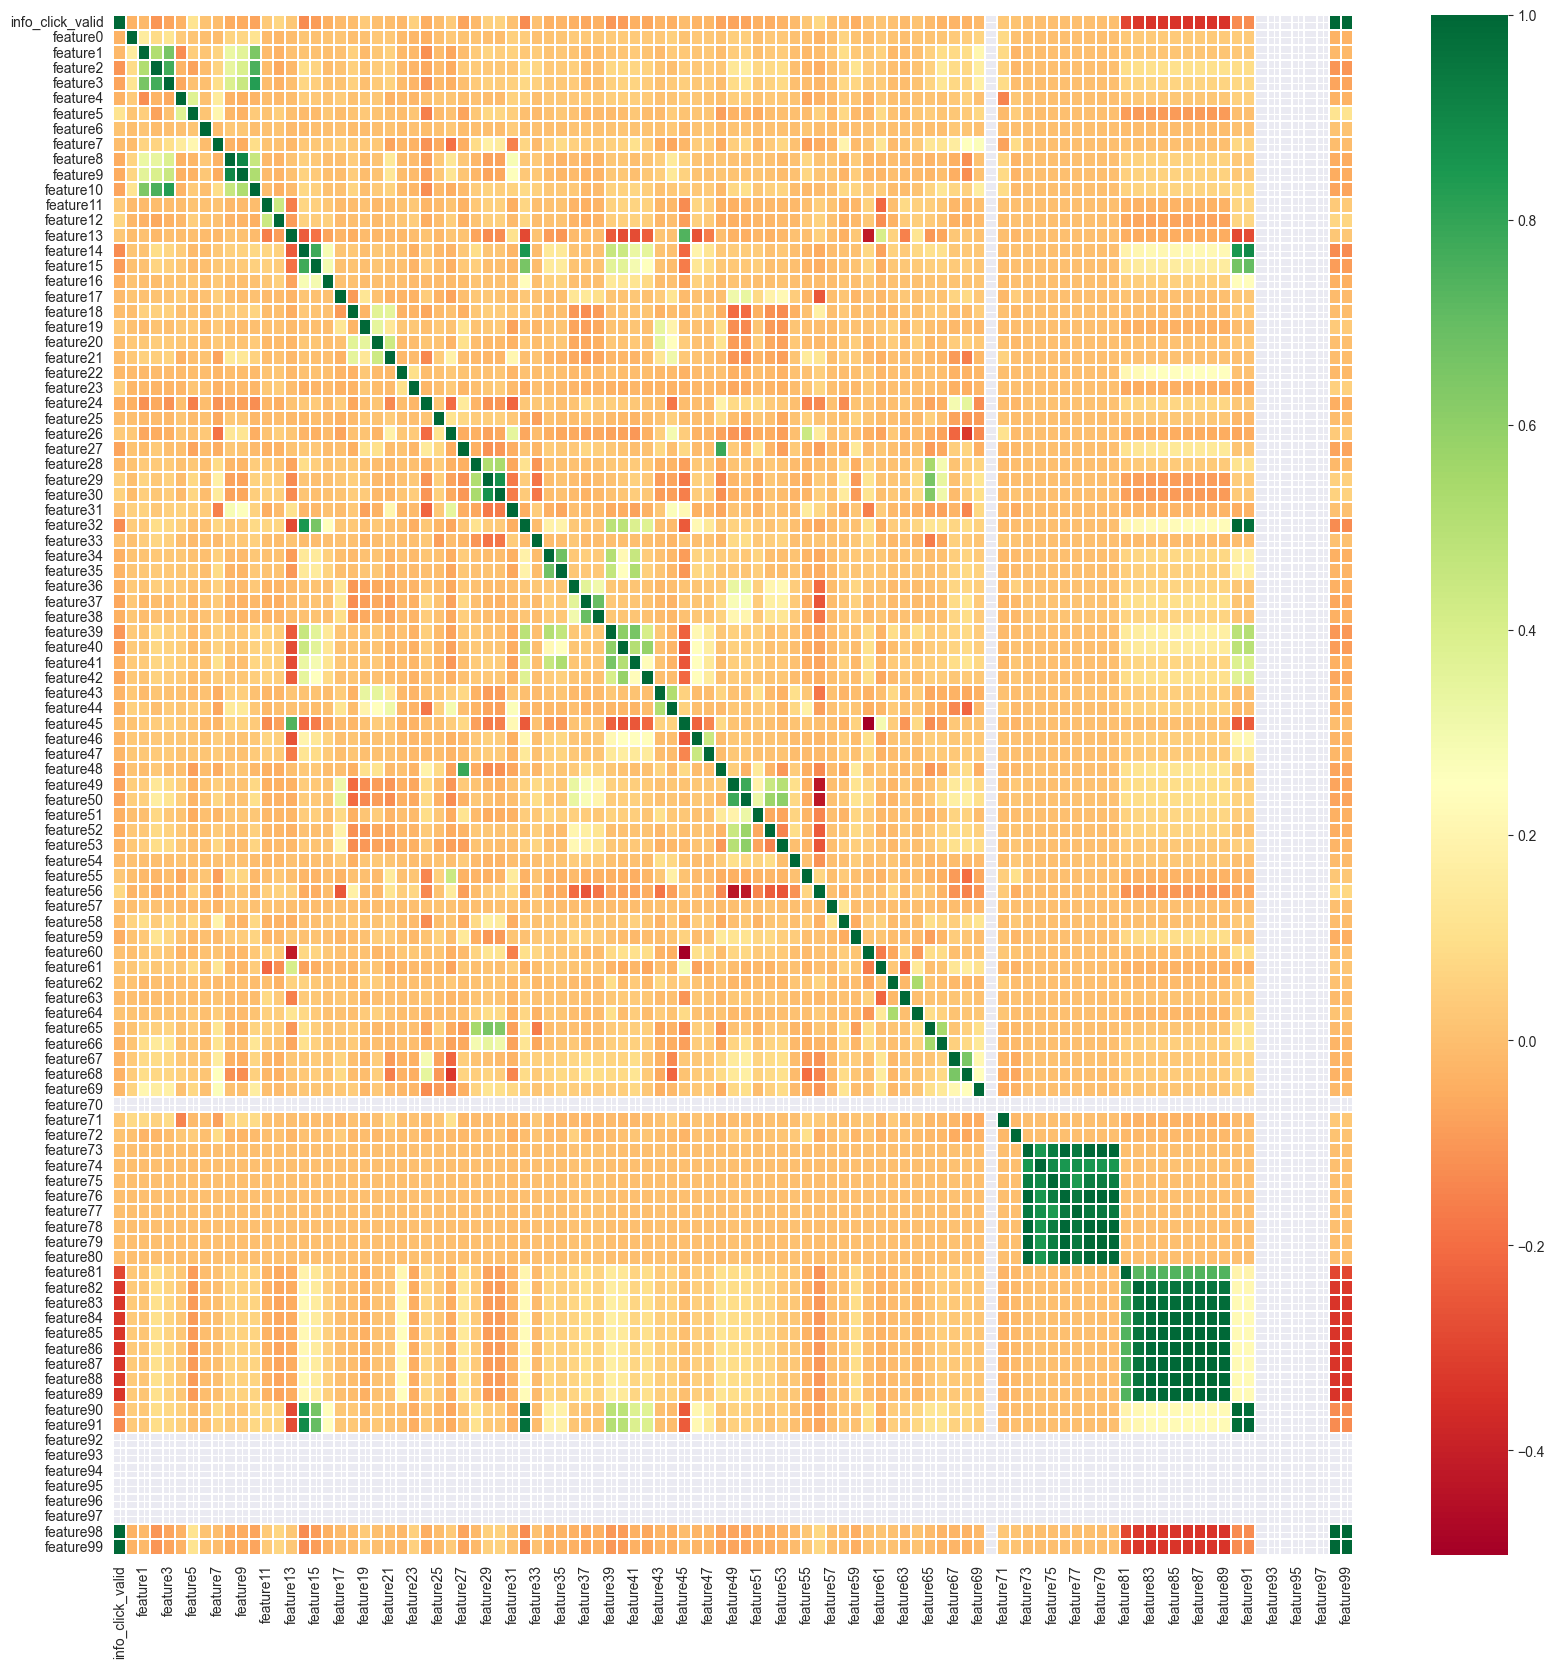

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap='RdYlGn', linewidths=0.2)
plt.show()